<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Advanced%20TensorFlow/Extending%20Keras/Week%204%20-%20Models%20and%20Callbacks/BasicModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [16]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

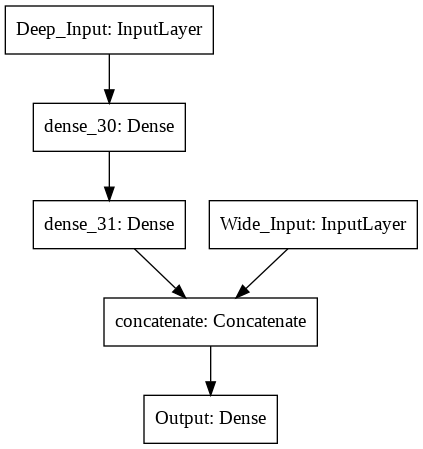

In [19]:
input_a = Input(shape=[1], name="Wide_Input")
input_b = Input(shape=[1], name="Deep_Input")
hidden_1 = Dense(30, activation="relu")(input_b)
hidden_2 = Dense(30, activation="relu")(hidden_1)
concat = concatenate([input_a, hidden_2])
output = Dense(1, name="Output")(concat)
model = Model(inputs=[input_a, input_b], outputs=[output])

plot_model(model)

In [ ]:
class WideAndDeepModel(Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = Dense(units, activation=activation)
    self.hidden2 = Dense(units, activation=activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output


In [ ]:
model = WideAndDeepModel()
